In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
sys.path.insert(0, os.path.abspath('..'))
from UKMovementSensing import hsmm
from milleniumcohort import create_config

In [3]:
config = create_config('../config.yml')
config.create_data_paths()

In [5]:
model_file_orig = '/media/sf_VBox_Shared/London/CLSdata500/results/mod_10st_0b_15r_720t_acceleration/model.pkl'
model_file_sub = '/media/sf_VBox_Shared/London/CLSdata250/results/mod_10st_0b_15r_720t_acceleration/model.pkl'

In [6]:
import pickle
with open(model_file_orig, 'r') as f:
    model_orig = pickle.load(file=f)
    
with open(model_file_sub, 'r') as f:
    model_sub = pickle.load(file=f)

In [63]:
params_orig = pd.DataFrame([[o.params['mu'][0]*1000 for o in model_orig.obs_distns],
              [o.params['sigma'][0][0]*1000 for o in model_orig.obs_distns]]).transpose().reset_index()
params_orig.columns = ['state', 'mean', 'sigma']

params_sub = pd.DataFrame([[o.params['mu'][0]*1000 for o in model_sub.obs_distns],
              [o.params['sigma'][0][0]*1000 for o in model_sub.obs_distns]]).transpose().reset_index()
params_sub.columns = ['state', 'mean', 'sigma']

In [65]:
params_orig = params_orig.sort_values('mean')
params_orig.index = range(len(params_orig))

In [66]:
params_sub = params_sub.sort_values('mean')
params_sub.index = range(len(params_sub))

In [67]:
params = pd.concat([params_orig, params_sub], axis=1, keys=['orig', 'sub'])
params

orig                           sub                        
  state        mean       sigma state        mean       sigma
0     5    0.016563    0.000247     1    0.039983    0.000496
1     6    5.224012    0.017303     2    5.808443    0.022846
2     8   18.955417    0.251233     0   20.978779    0.252522
3     9   35.370388    0.906046     9   29.143078    0.585609
4     0   46.900395    0.639371     3   63.189587    1.526341
5     7   78.407262    4.107857     7   71.372049    3.268943
6     4   87.347681    2.112939     8   88.824289    2.485879
7     3  100.141043    4.148632     4  104.392948    4.548113
8     2  172.369195    9.846896     5  199.503537   13.513618
9     1  483.348122  226.759184     6  547.683055  273.429208

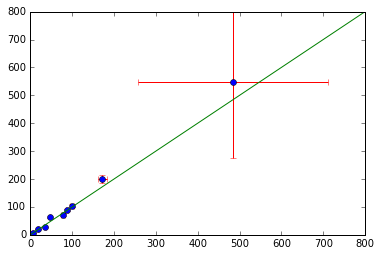

In [68]:
maxval = 800
plt.figure()
plt.errorbar(x=params_orig['mean'], y=params_sub['mean'],
             xerr=params_orig['sigma'], yerr=params_sub['sigma'], 
             fmt='o', ecolor='r')
plt.plot(range(maxval), range(maxval))
plt.xlim(0, maxval)
plt.ylim(0, maxval)
plt.show()

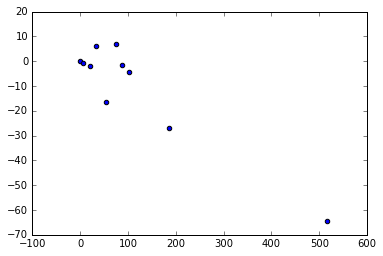

In [69]:
diff = params_orig['mean'] - params_sub['mean']
avg = 0.5 * (params_orig['mean'] + params_sub['mean'])
plt.scatter(avg, diff)

In [71]:
n_orig = 500
n_sub = 1 # 250
SE = params_orig['sigma'] / np.sqrt(n_sub)
z = (params_sub['mean'] - params_orig['mean']) / SE
z

0    94.897847
1    33.775745
2     8.053741
3    -6.873060
4    25.476891
5    -1.712624
6     0.698841
7     1.024894
8     2.755624
9     0.283715
dtype: float64

# Reproduce states on these 250

In [82]:
# Import data with states
filenames = os.listdir(config.states_path)
filenames = [fn for fn in filenames if os.path.isfile(os.path.join(config.states_path,fn))]

In [83]:
data_list = []
# Should be: acc, state1, state2

In [84]:
for fn in filenames:
    dataset = pd.read_csv(os.path.join(config.states_path,fn), 
                          encoding='utf-8', index_col='timestamp', 
                          parse_dates=True)
    X = dataset[config.hsmmconfig.column_names].as_matrix()
    prediction = model_orig.predict(X, 0)
    dataset['state_orig'] = prediction[1]
    data_list.append(dataset[['acceleration', 'state', 'state_orig']])

KeyboardInterrupt: 